# KKR vs RCB

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


# Q1) Who will win the match?

    1) KKR
    2) RCB

In [3]:
# get all matches between rcb vs kkr
kkr_rcb = matches[((matches.team1=='Kolkata Knight Riders')&(matches.team2=='Royal Challengers Bangalore'))|((matches.team2=='Kolkata Knight Riders')&(matches.team1=='Royal Challengers Bangalore'))]

print(f"Total number of matches between rcb vs kkr : {kkr_rcb.shape[0]}")

Total number of matches between rcb vs kkr : 24


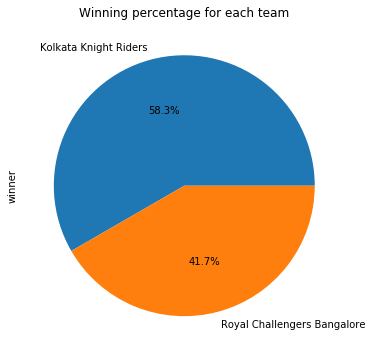

In [4]:
# calculating total wins by each team
kkr_rcb.winner.value_counts().plot("pie", autopct = "%1.1f%%", figsize=(20,6))
plt.title("Winning percentage for each team")
plt.show()

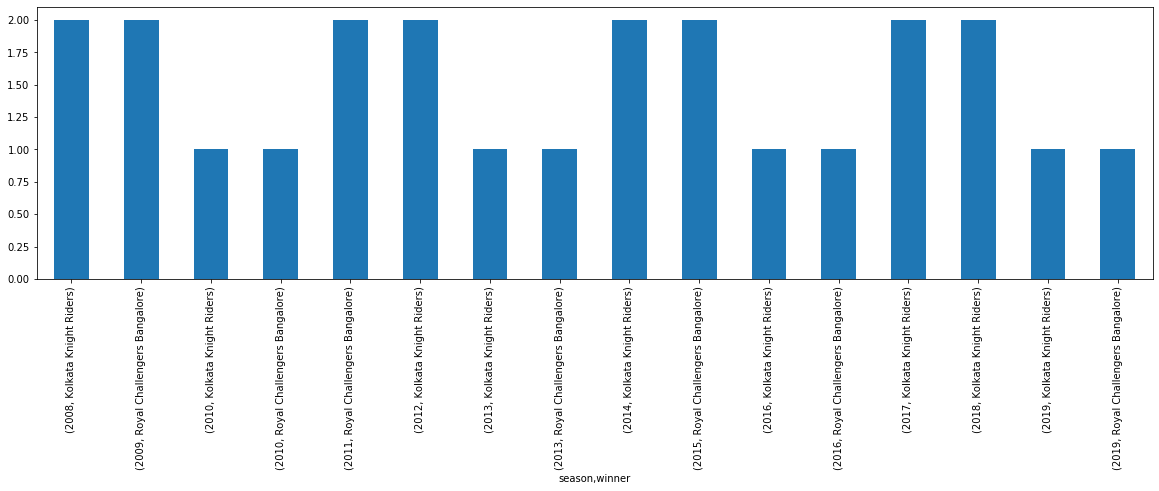

In [5]:
#checking winning percent per season
df_kkr_rcb = pd.DataFrame(kkr_rcb.groupby('season')['winner'].value_counts())
df_kkr_rcb['winner'].plot(kind='bar', figsize=(20,5))

**Inference:**
    - We can see that from the graph KKR has higher winning percentage than RCB.

# Q2) How many wickets will RCB loose in between the 31st ball and 120th ball?

    1) 0-1
    2) 2-3
    3) 4
    4) 5 or more

In [23]:
# get all rows when RCB bats and KKR bowls
rcbb_kkrf = deliveries[(deliveries.batting_team == 'Royal Challengers Bangalore')&(deliveries.bowling_team == 'Kolkata Knight Riders')]

# get only rows when RCB lost wickets
rcbb_kkrf_wickets = rcbb_kkrf[rcbb_kkrf.player_dismissed.notnull()]

#getting wickets only between 31st ball and 120th ball (6-20) over
rcbb_kkrf_wickets_o620 = rcbb_kkrf_wickets[rcbb_kkrf_wickets.over.isin(range(6,21))]

#count wickets rcb lost to kkr during 31st -120th ball match-wise
rcbb_kkrf_wicks_o620 = rcbb_kkrf_wickets_o620.groupby('match_id')['player_dismissed'].count().reset_index()

rcbb_kkrf_wicks_o620.head()

,match_id,player_dismissed
0,27,6
1,45,3
2,60,7
3,88,2
4,134,5


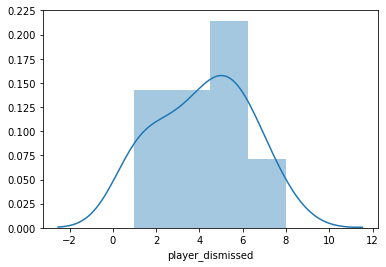

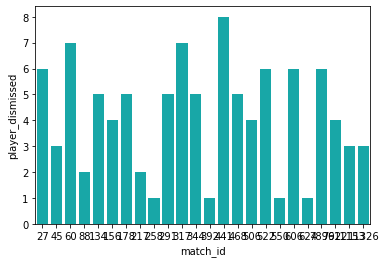

In [30]:

sns.distplot(rcbb_kkrf_wicks_o620['player_dismissed'])
plt.show()

# 
sns.barplot(x=rcbb_kkrf_wicks_o620['match_id'],y=rcbb_kkrf_wicks_o620['player_dismissed'], color='c')
plt.show()

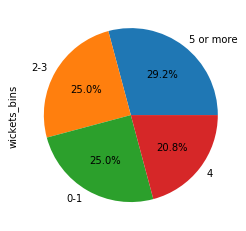

In [37]:
#create bins as per options

rcbb_kkrf_wicks_o620['wickets_bins'] = pd.cut(rcbb_kkrf_wicks_o620['player_dismissed'], bins=[0,2,4,5,10], labels=['0-1', '2-3', '4', '5 or more'])
rcbb_kkrf_wicks_o620['wickets_bins'].value_counts().plot(kind='pie', autopct = '%1.1f%%' )

**Inference:**
    - Even thought the data suggests RCB will loose 5 or more wickets at higher percent but 20202 season RCB is in great form actually both teams are. and there is equal probablity for 0-1 and 2-3 wickets. its a tough call we can say it might loose 0-1 wickets

# Q3) How many balls will AB De Villers take to score 30 runs?
    
    1) He won't score 30 runs
    2) Less than 18 balls
    3) 18-24
    4) 25 or more

In [157]:
# get all rows when AB De Villers is playing
abdvb_kkrf = deliveries[(deliveries.batsman == 'AB de Villiers')&(deliveries.bowling_team == 'Kolkata Knight Riders')]

# abdvb_kkrf_runs_cs = abdvb_kkrf.groupby('match_id')['batsman_runs'].apply(lambda x: x.agg(['count', 'sum']))

# abdvb_kkrf_runs_cs

abdvb_kkrf['batsman_runs_cumsum'] = abdvb_kkrf.groupby('match_id')['batsman_runs'].cumsum().values

df = abdvb_kkrf[['match_id', 'batsman_runs_cumsum', 'ball']]
df.groupby('match_id')['batsman_runs_cumsum', 'ball'].agg(['count', sum])


# df[df.batsman_runs_cumsum <=34]
for m in df['match_id'].unique():
    df1 = df[df.match_id==m]
    
    if df1.batsman_runs_cumsum.isin(range(30,36)).any():
        df2 = df1[df1.batsman_runs_cumsum<=32]
        display(df2.shape[0])

# for m in df['match_id'].unique():
#     print(m)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


28

22

11

21

**Inference:**
    - Data suggests AB de villers will take on average 23or24 balls to score 30 runs. If he is not cought out.

# Q4) What will be difference in Eoin Morgan's overall strike rate and the strike rate of the last 7 balls he plays?

[HINT: Calculate overall strike rate for all matches (or) matches against RCB and take any central tendency measure. Then calculate his strike rate in last 7 balls in each of those matches and take any central tendency measure. Finally subtract the 2 and consider only the absoulute value]

    1) Less than 75
    2) 75-125
    3) 126-150
    4) 151 or more
    

In [51]:
#getting all rows when morgan bats and the RCB bowls
emb_rcbf = deliveries[(deliveries.batsman == 'EJG Morgan')&(deliveries.bowling_team== 'Royal Challengers Bangalore')]

emb_rcbf

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
60997,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,18,3,EJG Morgan,YK Pathan,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61001,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,19,1,EJG Morgan,YK Pathan,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61003,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,19,3,EJG Morgan,YK Pathan,Z Khan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61010,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,4,EJG Morgan,YK Pathan,S Aravind,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
61012,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,6,EJG Morgan,MK Tiwary,S Aravind,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
61013,258,1,Kolkata Knight Riders,Royal Challengers Bangalore,20,7,EJG Morgan,MK Tiwary,S Aravind,0,...,0,0,0,0,0,0,0,EJG Morgan,run out,AB de Villiers
68723,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,1,EJG Morgan,JH Kallis,CK Langeveldt,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
68728,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,6,EJG Morgan,JH Kallis,CK Langeveldt,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
68729,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,1,EJG Morgan,JH Kallis,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
68730,291,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,2,EJG Morgan,JH Kallis,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [58]:
#calculating overall strike rate

#gettin total balls played
emb_rcbf_balls = emb_rcbf.groupby('match_id')['ball'].count().reset_index()

#getting total runse scored per match
emb_rcbf_scores = emb_rcbf.groupby('match_id')['batsman_runs'].sum().reset_index()

emb_rcbf_sr = emb_rcbf_balls.merge(emb_rcbf_scores, on='match_id')

emb_rcbf_sr['strike_rate'] = np.round((emb_rcbf_sr['batsman_runs']/emb_rcbf_sr['ball'])*100,2)
                                         
emb_rcbf_sr

,match_id,ball,batsman_runs,strike_rate
0,258,6,6,100.00
1,291,5,2,40.00
2,392,5,2,40.00
3,568,7,11,157.14
4,580,18,22,122.22


In [73]:
last_7_sr = []

#calculating strike rate for last 7 balls
for m in emb_rcbf.match_id.unique():
    
    df = emb_rcbf[emb_rcbf.match_id == m][-1:-7:-1] #getting last 7 rows for each match
    
    #gettin total balls played
    df_balls = df.groupby('match_id')['ball'].count().reset_index()

    #getting total runse scored per match
    df_scores = df.groupby('match_id')['batsman_runs'].sum().reset_index()

    df_sr = df_balls.merge(df_scores, on='match_id')

    df_sr['strike_rate'] = np.round((df_sr['batsman_runs']/df_sr['ball'])*100,2)

    last_7_sr.append(float(df_sr['strike_rate']))
    
last_7_sr

[100.0, 40.0, 40.0, 166.67, 100.0]

In [76]:
#clubbing last7 strike rate calculated with overall strike rate for easier calculation
emb_rcbf_sr['last_7_sr'] = last_7_sr

emb_rcbf_sr['sr_difference_overall_last7'] = np.abs(emb_rcbf_sr['strike_rate'] - emb_rcbf_sr['last_7_sr'])

emb_rcbf_sr

,match_id,ball,batsman_runs,strike_rate,last_7_sr,sr_difference_overall_last7
0,258,6,6,100.00,100.00,0.00
1,291,5,2,40.00,40.00,0.00
2,392,5,2,40.00,40.00,0.00
3,568,7,11,157.14,166.67,9.53
4,580,18,22,122.22,100.00,22.22


In [83]:
#difference between overall strike rate difference using central tendencies
print('Difference of overall score and last seven strike rate ')
print(f"difference (median): {emb_rcbf_sr['strike_rate'].median() - emb_rcbf_sr['last_7_sr'].median()}")
print(f"difference (median): {emb_rcbf_sr['strike_rate'].mean() - emb_rcbf_sr['last_7_sr'].mean()}")

Difference of overall score and last seven strike rate 
difference (median): 0.0
difference (median): 2.538000000000011


**Inference:**
    As per the stats of historic data the difference between overall strike rate and strike rate in last7 runs is definitely less than 75. We can say that morgan is pretty consistent throught out the play of his match.

# Q5) How many runs will RCB score off KKR in the death?

    1) 0-35
    2) 36-45
    3) 46-60
    4) 61 or more

In [11]:
#get all rows when rcb bats and kkr bowls
rcbb_kkfrf = deliveries[(deliveries.batting_team=='Royal Challengers Bangalore')&(deliveries.bowling_team=='Kolkata Knight Riders')]

#get only rows of death overs (16-20)
rcbb_kkfrf_death = rcbb_kkfrf[rcbb_kkfrf.over.isin(range(16,21))]

#count total runs during death per match
rcbb_kkfrf_death_runs = rcbb_kkfrf_death.groupby('match_id')['total_runs'].sum()
rcbb_kkfrf_death_runs

match_id
45       53
60        1
88       13
134      45
156      57
178      46
217      42
258      23
317      42
344      56
392      41
441      31
468      32
506      59
522      60
606      73
624      51
7896     45
7922     69
11153    66
11326    94
Name: total_runs, dtype: int64

In [14]:
rcbb_kkfrf_death_runs.describe()

count    21.000000
mean     47.571429
std      20.848433
min       1.000000
25%      41.000000
50%      46.000000
75%      59.000000
max      94.000000
Name: total_runs, dtype: float64

Text(0.5, 1.0, 'Total runs distribution scored by rcb against kkr durin death')

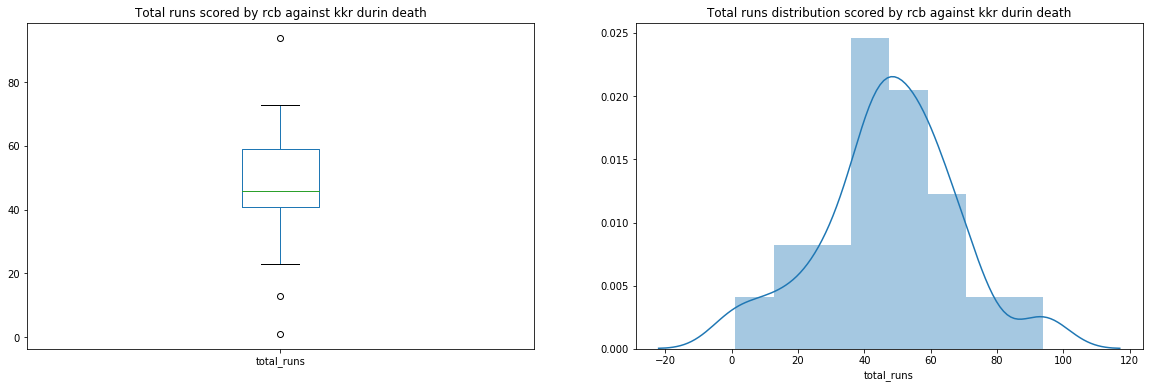

In [85]:
fig, ax= plt.subplots(1,2, figsize=(20,6))
rcbb_kkfrf_death_runs.plot('box', ax=ax[0])
ax[0].set_title("Total runs scored by rcb against kkr durin death")

sns.distplot(rcbb_kkfrf_death_runs, ax=ax[1])
ax[1].set_title("Total runs distribution scored by rcb against kkr durin death")

Text(0.5, 1.0, 'Checking counts of how many times RCB scored against KKR')

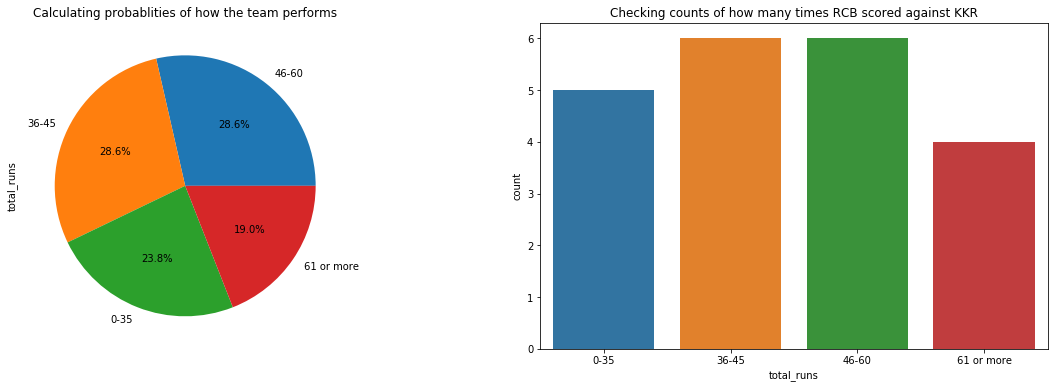

In [86]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
pd.cut(rcbb_kkfrf_death_runs, bins=[0,36,46,61,100], labels=['0-35', '36-45', '46-60', '61 or more']).value_counts().plot('pie', autopct='%1.1f%%', ax=ax[0])
ax[0].set_title("Calculating probablities of how the team performs")

sns.countplot(pd.cut(rcbb_kkfrf_death_runs, bins=[0,36,46,61,100], labels=['0-35', '36-45', '46-60', '61 or more']), ax=ax[1])
ax[1].set_title("Checking counts of how many times RCB scored against KKR")

**Inference:**
    The data suggests equal probability for 36-45 and 46-60 runs in death overs. So its almost difficult to predict the same but going with gut feeling the team has been performing really well in recent matches . So we can say probably 46-60 runs
    - 